## 뉴턴랩슨방법

In [ ]:
# import numpy as np
from scipy.optimize import newton

def equation(z, Bi):
    return z * np.tan(z) - Bi
import sympy as sy
pi = float(sy.pi)
# pager_print정식 ζtan(ζ) = Bi를 해결합니다.
Bi = 1  # 주어진 Bi 값
x =sy.Symbol("x")
## pi*1/3 + (n-1)*pi를 인자로 넣은 이유는, 양수인 Bi값을 y로 둘때 교차할 수 있는 지점이
## pi마다 반복되기 때문이다.
## 이는 xtanx그래프를 그려보면 더 자세하게 알 수 있다.
solution = newton(equation, pi*1/3 + (n-1)*pi, args=(Bi,))
print("고유값은 %s"%solution)

NameError: name 'n' is not defined

## "cos(λ_n*x) * cos(λ_m*x)의 0부터 1까지 x에 대한 적분이 0이다"를 보이기 

##### λtanλ = Bi로 얻은 n번째 λ와 m번째 λ에 대해서 cos(λ_nx) * cos(λ_mx)의 0-1적분은 0이다.

In [ ]:
import numpy as np
from scipy.optimize import newton

def equation(z, Bi):
    return z * np.tan(z) - Bi
import sympy as sy
pi = float(sy.pi)
# pager_print정식 ζtan(ζ) = Bi를 해결합니다.
Bi = 1  # 주어진 Bi 값
x =sy.Symbol("x")
h1 = int(input("n번째 값"))
h2 = int(input("m번째 값"))
li = [h1, h2]
for i, n in enumerate(li):
    solution = newton(equation, pi*1/3 + (n-1)*pi, args=(Bi,))
    print("Solution: ζ =", solution)
    if i == 0:
        expr = sy.cos(x*solution)
    else:
        expr *= sy.cos(x*solution)
print(expr)
expr = expr.integrate()
print(expr)
적분값 = expr.subs(x,1)-expr.subs(x,0)
print("\n##### 적분값이  %s ###### \n##### 이므로 거의 0에 수렴한다. 따라서 cos(λ_nx) * cos(λ_mx)의 적분은 0으로 봐도 무방하다"%적분값)

n번째 값1
m번째 값2
Solution: ζ = 0.8603335890193798
Solution: ζ = 3.4256184594817283
cos(0.86033358901938*x)*cos(3.42561845948173*x)
-0.0782499324474076*sin(0.86033358901938*x)*cos(3.42561845948173*x) + 0.311570321636018*sin(3.42561845948173*x)*cos(0.86033358901938*x)

##### 적분값이  -6.93889390390723e-18 ###### 
##### 이므로 거의 0에 수렴한다. 따라서 cos(λ_nx) * cos(λ_mx)의 적분은 0으로 봐도 무방하다


### 1부터 n까지의 λ값 리스트 얻는 함수

In [ ]:
## 1부터 n까지의 λ값 리스트 얻는 함수
def get_lambdas(nth, Bi):
    lambda_list = []
    for n in range(1,nth+1):
        solution = newton(equation, pi*1/3 + (n-1)*pi, args=(Bi,))
#         print("Solution: ζ =", solution)
        lambda_list.append(solution)
    return lambda_list
get_lambdas(2,0.1)
def get_An_list(n,Bi):
    li = []
    for lambda_ in get_lambdas(n,Bi):
        li.append(4*sy.sin(lambda_)/(2*lambda_+sy.sin(2*lambda_)))
    return li

[0.31105284820046253, 3.173097176692873]

biot12
[0.  0.  0.  ... 1.5 1.5 1.5]


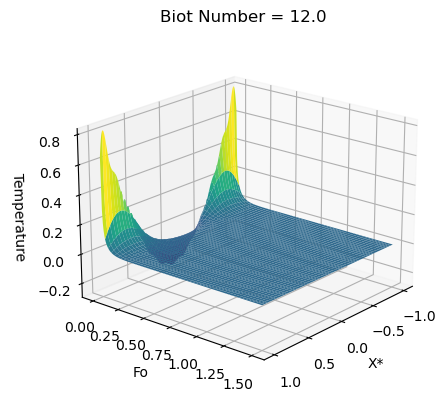

In [ ]:
def get_unsteady_1D_funtion(nth,Bi):
    lambda_list = get_lambdas(nth, Bi)
    An_list = get_An_list(nth, Bi)
    tau = sy.Symbol("tau")
    X = sy.Symbol("X")
    for i, (lambda_, An) in enumerate(zip(lambda_list, An_list)):
        if i == 0:
            expr = An*sy.exp(-lambda_*lambda_*tau)*sy.cos(lambda_*X)
        else:
            expr += An*sy.exp(-lambda_*lambda_*tau)*sy.cos(lambda_*X)
#     print(expr)
    return expr

import sympy as sy
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

tau = sy.Symbol("tau")
X = sy.Symbol("X")
bi = float(input("biot"))
new_result = get_unsteady_1D_funtion(12,bi)
X_ = np.linspace(-1, 1, 500)
Tau_ = np.linspace(0, 1.5, 250)

X_, Tau_ = np.meshgrid(X_, Tau_)

xx = X_.flatten()
tt = Tau_.flatten()
print(tt)
# Numpy 배열로 변환
# result_func = sy.lambdify((x, t), new_result, modules=['numpy'])
# result_arr = result_func(xx, tt)
result_func = sy.lambdify((X, tau), new_result, modules=['numpy'])
result_arr = np.vectorize(result_func)(xx, tt)
real_mat = np.real(result_arr).reshape(X_.shape)
imag_mat = np.imag(result_arr).reshape(X_.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.set_xlabel('Tau')  # x 축 이름 설정
# ax.set_ylabel('X')  # y 축 이름 설정
# ax.set_zlabel('Temperature')  # z 축 이름 설정
# surf = ax.plot_surface(Tau_, X_, real_mat, cmap='viridis')
ax.set_ylabel('Fo')  # x 축 이름 설정
ax.set_xlabel('X*')  # y 축 이름 설정
ax.set_zlabel('Temperature')  # z 축 이름 설정
ax.set_title("Biot Number = %s"%bi)
ax.view_init(elev=20, azim=40)
surf = ax.plot_surface( X_,Tau_, real_mat, cmap='viridis')
plt.show()

biot1
한 항만 보시겠습니까? 아니면 0 맞으면 보고싶은 n번째 항을 정수로 입력10
[  0.   0.   0. ... 250. 250. 250.]


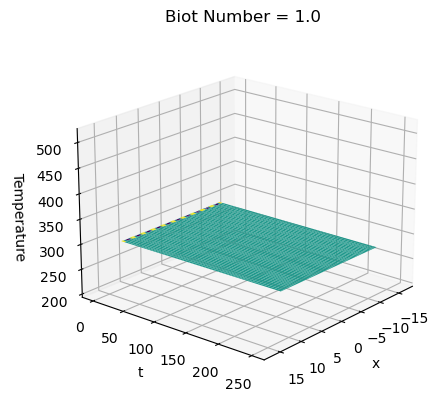

In [ ]:
## 1부터 n까지의 λ값 리스트 얻는 함수
def get_lambdas(nth, Bi):
    lambda_list = []
    for n in range(1,nth+1):
        solution = newton(equation, pi*1/3 + (n-1)*pi, args=(Bi,))
#         print("Solution: ζ =", solution)
        lambda_list.append(solution)
    return lambda_list
get_lambdas(2,0.1)
def get_An_list(n,Bi):
    li = []
    for lambda_ in get_lambdas(n,Bi):
        li.append(4*sy.sin(lambda_)/(2*lambda_+sy.sin(2*lambda_)))
    return li
def get_unsteady_1D_funtion2(nth,Bi, Alpha, L, Ti , Tinf, get_one=-1):
    lambda_list = get_lambdas(nth, Bi)
    An_list = get_An_list(nth, Bi)
    t = sy.Symbol("t")
    x = sy.Symbol("x")
    if get_one !=-1:
        An = An_list[get_one]
        lambda_ = lambda_list[get_one]
        expr = An*sy.exp(-lambda_*lambda_*Alpha*t/(L**2))*sy.cos(lambda_*x/L)
    else:
        
        for i, (lambda_, An) in enumerate(zip(lambda_list, An_list)):
            if i == 0:
                expr = An*sy.exp(-lambda_*lambda_*Alpha*t/(L**2))*sy.cos(lambda_*x/L)
            else:
                expr += An*sy.exp(-lambda_*lambda_*Alpha*t/(L**2))*sy.cos(lambda_*x/L)
        print(expr)
    return expr*(Ti-Tinf)+Tinf
def get_approximatly(expr,Ti, Tinf):
    expr = (expr-Tinf)/(Ti-Tinf)-0.01
    expr = expr.subs(x, 0)
    solves = sy.solve(expr, t,2)
    return solves

t = sy.Symbol("t")
x = sy.Symbol("x")
Alpha = 2
L = 12
bi = float(input("biot"))
Ti = 520
T_inf = 290
get_one = int(input("한 항만 보시겠습니까? 아니면 0 맞으면 보고싶은 n번째 항을 정수로 입력"))
new_result = get_unsteady_1D_funtion2(13,bi,2,12, Ti, T_inf,get_one)
# print(get_approximatly(new_result, Ti, T_inf))

x_ = np.linspace(-L, L, 500)
T_ = np.linspace(0, 250, 1000)

X_, Tau_ = np.meshgrid(x_, T_)

xx = X_.flatten()
tt = Tau_.flatten()
print(tt)
# Numpy 배열로 변환
# result_func = sy.lambdify((x, t), new_result, modules=['numpy'])
# result_arr = result_func(xx, tt)
result_func = sy.lambdify((x, t), new_result, modules=['numpy'])
result_arr = np.vectorize(result_func)(xx, tt)
real_mat = np.real(result_arr).reshape(X_.shape)
imag_mat = np.imag(result_arr).reshape(X_.shape)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
# ax.set_xlabel('Tau')  # x 축 이름 설정
# ax.set_ylabel('X')  # y 축 이름 설정
# ax.set_zlabel('Temperature')  # z 축 이름 설정
# surf = ax.plot_surface(Tau_, X_, real_mat, cmap='viridis')
ax.set_ylabel('t')  # x 축 이름 설정
ax.set_xlabel('x')  # y 축 이름 설정
ax.set_zlabel('Temperature')  # z 축 이름 설정
ax.set_title("Biot Number = %s"%bi)
ax.view_init(elev=20, azim=40)
ax.set_zlim(200,Ti)
ax.set_xlim(-1.5*L, 1.5*L)
surf = ax.plot_surface( X_,Tau_, real_mat, cmap='viridis')
plt.show()
